In [1]:
import numpy as np
from scipy.stats.stats import pearsonr
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time

from os.path import exists

/opt/python/2.7.10/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def get_SN(outputsumfreq):
    noise_std = np.std(outputsumfreq[:5]) 
    noise_mean = np.mean(outputsumfreq[:5])
    sigs_noise = (outputsumfreq-noise_mean)/noise_std
    return sigs_noise

def load_gp(time_string,nchan):
    
    gp1 = np.load('/home/ramain/GPs/GPef/p{}.npy'.format(time_string))
    gp1t = np.fft.irfft(gp1,axis=1)
    gp1s = gp1t.reshape(-1,2*nchan,16)
    gp1s = np.fft.rfft(gp1s,axis=1)
    dchan = gp1s
    dR = np.concatenate((dchan[:,::-1,8], dchan[...,0], dchan[:,::-1,10], dchan[...,2], dchan[:,::-1,12], dchan[...,4], dchan[:,::-1,14], dchan[...,6]), axis=1)
    dL = np.concatenate((dchan[:,::-1,9], dchan[...,1], dchan[:,::-1,11], dchan[...,3], dchan[:,::-1,13], dchan[...,5], dchan[:,::-1,15], dchan[...,7]), axis=1)
    output = (abs(dR)**2 + abs(dL)**2).T


    outputsumfreq = output.sum(0) #dedispersed
    #computes signal to noise after summing all the frequencies
    sigs_noise = get_SN(outputsumfreq)
    S_N = max(sigs_noise)

    peak_time = np.argmax(sigs_noise)
    
    background_freq = output[:,peak_time-5:peak_time-1].mean(1)
    
    output_pulse = output[:,peak_time]

    freq_spec = output_pulse-background_freq
    
    return freq_spec



In [24]:
gp1 = np.load('/home/ramain/GPs/GPef/p2015-10-18T23:49:17.214.npy')

In [4]:
%pylab inline
gp1.dtype

Populating the interactive namespace from numpy and matplotlib


dtype('complex128')

In [4]:
gp1.shape

(64, 129, 16)

dtype('float64')

In [25]:
gp1t = np.fft.irfft(gp1,axis=1)
nchan = 512
gp1s = gp1t.reshape(-1,2*nchan,16)
gp1s = np.fft.rfft(gp1s,axis=1)
gp1s.shape

(16, 513, 16)

In [26]:
# dchan = np.fft.rfft(d_dedispersed.reshape(-1, 2*nchan, 16), axis=1)
dchan = gp1s
dR = np.concatenate((dchan[:,::-1,8], dchan[...,0], dchan[:,::-1,10], dchan[...,2], dchan[:,::-1,12], dchan[...,4], dchan[:,::-1,14], dchan[...,6]), axis=1)
dL = np.concatenate((dchan[:,::-1,9], dchan[...,1], dchan[:,::-1,11], dchan[...,3], dchan[:,::-1,13], dchan[...,5], dchan[:,::-1,15], dchan[...,7]), axis=1)
output = (abs(dR)**2 + abs(dL)**2).T



(4104, 16)

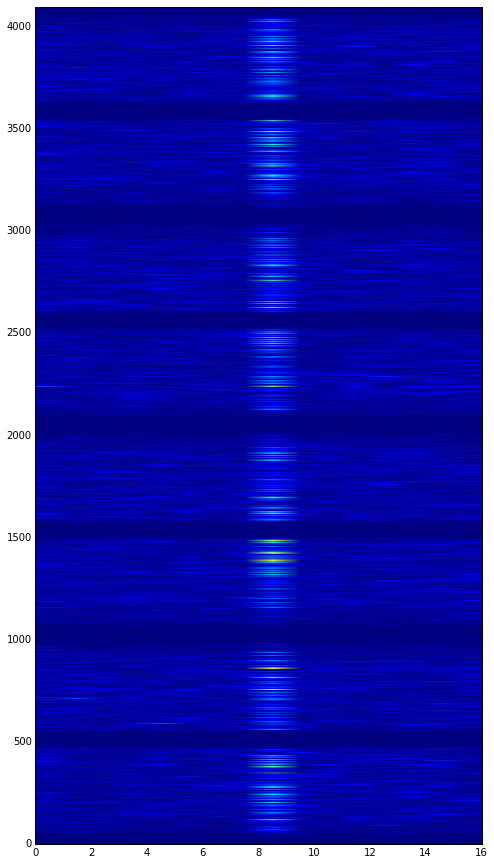

In [27]:
figure(figsize = (8,15))
imshow(output,extent = [0,64*128/nchan,0,nchan*8],aspect = 'auto')
output.shape

In [28]:
def get_SN(outputsumfreq):
    noise_std = np.std(outputsumfreq[:5]) 
    noise_mean = np.mean(outputsumfreq[:5])
    sigs_noise = (outputsumfreq-noise_mean)/noise_std
    return sigs_noise

outputsumfreq = output.sum(0) #dedispersed
#computes signal to noise after summing all the frequencies
sigs_noise = get_SN(outputsumfreq)
S_N = max(sigs_noise)

peak_time = np.argmax(sigs_noise)

output_pulse = output[:,peak_time]

background_freq = output[:,peak_time-5:peak_time-1].mean(1)

freq_spec = output_pulse

272.26339465780399

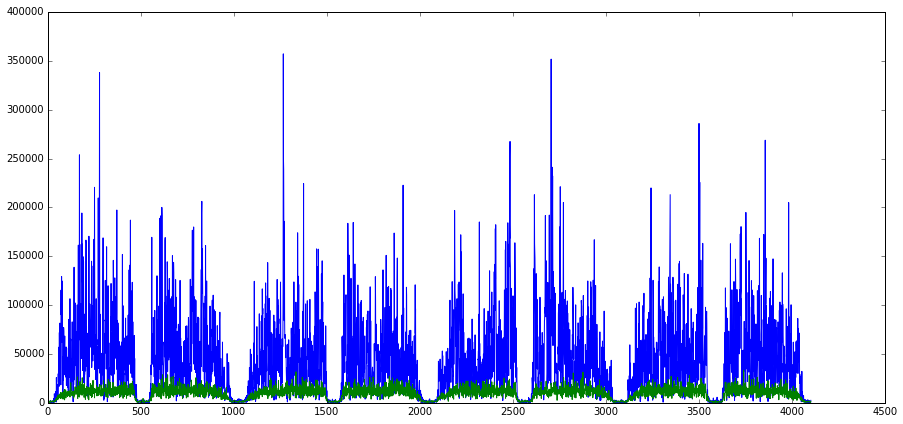

In [29]:
figure(figsize=(15,7))
plot(freq_spec)
plot(background_freq)
S_N